In [1]:
import time
import yaml
import json
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit import IBMQ
import matplotlib.pyplot as plt
from IPython.display import display
from qiskit.test.mock import FakeVigo
from qiskit.tools.monitor import job_monitor
from qiskit.converters import circuit_to_dag
from qiskit import QuantumCircuit, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_circuit_layout
from sympy.utilities.iterables import multiset_permutations

%matplotlib inline

In [2]:
IBMQ.save_account('de404b7eba21afacf3e900bcd1cc1244967cecad8f7051683e08ff88d444aee2e6cb029f51036d2eb8efd6f18bd04acf5d9bc0891891ebe4c1bb1ab062f7741b', overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider(hub='ibm-q', group='open')
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
devname = str(least_busy(small_devices))
devname

'ibmq_santiago'

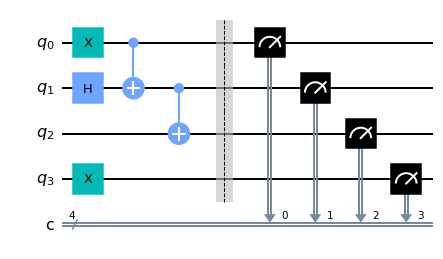

In [4]:
qc = QuantumCircuit(4,4)
qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.cx(1,2)
qc.x(3)
qc.barrier()
qc.measure(range(4), range(4))
qc.draw(output='mpl')

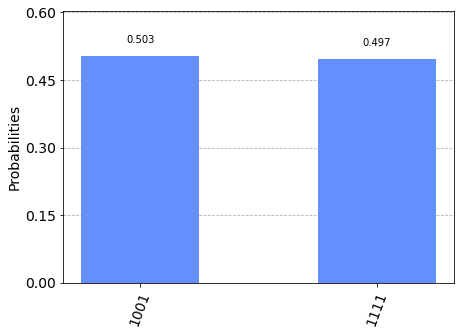

In [5]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(qc,simulator).result().get_counts()
fig = plot_histogram(results)
display(fig)

In [ ]:
device = provider.get_backend(devname)
job = execute(qc, backend = device, shots = 1024)
job_monitor(job)
device_result = job.result()
plot_histogram(device_result.get_counts(qc))

In [6]:
qubits = np.array([0, 1, 2, 3])
arr = []
for p in multiset_permutations(qubits):
    arr.append(p)

In [ ]:
backend = provider.get_backend(devname)
transpiled_circuit = transpile(qc, backend, initial_layout=arr[2])
plot_circuit_layout(transpiled_circuit, backend)

results = execute(qc, backend = provider.get_backend(devname), initial_layout = arr[2], shots = 1000).result().get_counts()
plot_histogram(results)

In [ ]:
def gatecount(qc, layout, devname):
    backend = provider.get_backend(devname)
    
    transpiled_circuit = transpile(qc, backend, initial_layout = layout)
    count = transpiled_circuit.count_ops()
    print('Gate counts - ', )
    print(json.dumps(count,indent=4))
    
def plothistogram(qc, layout, devname):
    backend = provider.get_backend(devname)
    
    transpiled_circuit = transpile(qc, backend, initial_layout=layout)
    
    results = execute(qc, backend = provider.get_backend('ibmq_santiago'), initial_layout = layout, shots = 1000)
    job_monitor(results)
    fig = plot_histogram(results.result().get_counts())
    display(fig)

In [ ]:
plothistogram(qc, arr[10], devname)